## Машины экстремального обучения

Горчаков А.В., кафедра корпоративных информационных систем, РТУ МИРЭА

*Интеллектуальные алгоритмы* позволяют автоматизировать выявление скрытых нетривиальных закономерностей в данных, причём накопленные сведения автоматически обобщаются до информации, которая может быть охарактеризована как *знания*. Алгоритмы *машинного обучения* способны выполнять предсказания исходя из опыта, накопленного в результате анализа больших данных.

*Машина экстремального обучения* (англ. Extreme Learning Machine, ELM) — архитектура искусственной нейронной сети, алгоритма машинного обучения с учителем, описанная Guang-Bin Huang в 2006 г. в работе [Extreme learning machine: Theory and applications](https://www.sciencedirect.com/science/article/abs/pii/S0925231206000385). По скорости обучения ELM значительно превосходит классические искусственные нейронные сети.

Задача машинного обучения состоит в построении отображения $f: X \rightarrow Y$, позволяющего по объекту из множества $X$ определить его характеристику $Y$. Например, в задаче распознавания рукописных цифр $X$ обозначает множество рукописных цифр, а $Y$ — метку класса, цифру из множества $\{0, 1, 2, 3, \cdots, 9\}$. Задача распознавания рукописных цифр здесь — это задача классификации объектов на 10 классов.

### 1. Подготовка данных

Целью данного этапа является формирование обучающей и тестовой выборки.

**Задача 1.1.** Загрузите набор данных с рукописными цифрами, используя функцию `load_digits()` из модуля `sklearn.datasets`. Рукописные цифры в наборе представлены в виде векторов, принадлежащих пространству $\mathbb{R}^{64}$. Преобразуйте векторы к матрицам, принадлежащим пространству $\mathbb{R}^{8\times8}$, воспользуйтесь средствами `numpy`. Визуализируйте несколько рукописных цифр из загруженного набора данных $X$ средствами библиотеки `matplotlib`. Вместе с визуализацией цифры выведите на экран метку её класса.

1


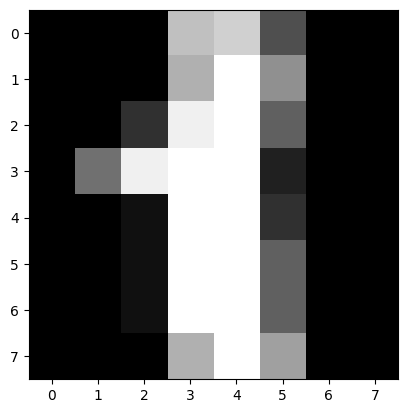

In [39]:
import math

from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import random

digits = load_digits()

mtx_digits = np.reshape(digits.data, (digits.data.shape[0], 8, 8))

plt.imshow(mtx_digits[1], cmap='gray')
print(digits.target[1])

**Задача 1.2.** Примените минимаксное масштабирование к рукописным цифрам из множества $X$, представленным векторами, принадлежащими пространству $\mathbb{R}^{64}$, воспользовавшись классом `MinMaxScaler` из библиотеки `sklearn`. Убедитесь, что компоненты каждого вектора $\vec{x}_i\in X$, кодирующего каждую $i$-ю цифру, принадлежат вещественному промежутку $[0, 1]$.

In [57]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_digits = scaler.fit_transform(digits.data)
print(scaled_digits)

ValueError: Found array with dim 3. MinMaxScaler expected <= 2.

**Задача 1.3.** Преобразуйте метки классов рукописных цифр в векторы, принадлежащие пространству $\mathbb {R}^{10}$, используя унитарный код (англ. one-hot encoding). Воспользуйтесь классом `OneHotEncoder` из библиотеки `sklearn`.

In [41]:
encoder = OneHotEncoder()
targets = encoder.fit_transform(digits.target.reshape(-1, 1))
print(targets[3])

  (0, 3)	1.0


**Задача 1.4.** Разбейте набор данных, состоящий из множества масштабированных векторов $x_i \in X$ и множества меток классов $y_i \in Y$, на обучающую и тестовую выборки. Воспользуйтесь функцией `train_test_split` из библиотеки `sklearn`. Пусть обучающий набор содержит 70% от общего числа пар объект-ответ, а тестовый набор — 30% от общего числа. Убедитесь, что разделение произведено корректно, визуализировав несколько рукописных цифр из новых выборок вместе с их метками классов.

2


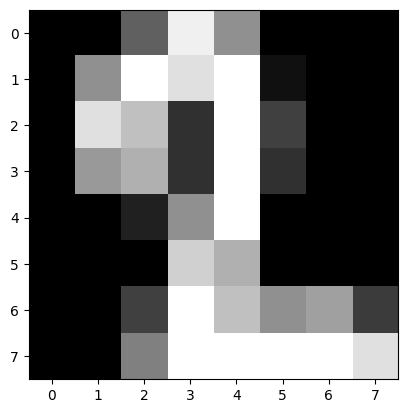

In [60]:
scaled_mtx_digits = np.reshape(scaled_digits, (scaled_digits.shape[0], 8, 8))
X_train, X_test, y_train, y_test = train_test_split(scaled_mtx_digits, digits.target, test_size=0.3)

plt.imshow(X_train[0], cmap='gray')
print(y_train[0])

### 2. Обучение Машины экстремального обучения

Последовательность действий для обучения классификатора на основе Машины экстремального обучения имеет вид:

<div style="margin-top:10px; display: block;width:100%">
<img src="https://user-images.githubusercontent.com/6759207/205480896-79304871-0905-4444-9a05-bf2592e5ef60.png" width="600px" align="left" />
</div>

Результатом обучения являются веса нейронной сети $\mathbf{\alpha}$, $\beta$, вектор сдвигов $\vec {b}$.

Целью данного этапа является обучение алгоритма на размеченной обучающей выборке, подготовленной ранее.

**Задача 2.1.** Реализуйте функцию `make_alpha(d, m)`, инициализирующую матрицу $\mathbf{\alpha} \in \mathbb{R}^{d \times m}$ случайными числами из $[-1,1]$.

In [43]:
Matrix = np.ndarray

def make_alpha(d: int, m: int) -> Matrix:
    return np.array([[(random.random() * 2 - 1) for i in range(m)] for j in range(d)])

print(make_alpha(5, 5))

[[ 0.08512473  0.24460469 -0.78213846 -0.5060102  -0.9323176 ]
 [ 0.49647792  0.62383627  0.347332   -0.92959681  0.8370321 ]
 [-0.68111938  0.7068427  -0.26649071  0.22194929  0.26034791]
 [-0.6189647   0.19356234  0.103722   -0.20478084 -0.29095596]
 [-0.69484665  0.55067882 -0.30878199 -0.085858    0.6799917 ]]


**Задача 2.2.** Реализуйте функцию `make_b_vec(d)`, инициализирующую вектор $\vec{b}\in\mathbb{R}^{d}$ случайными числами из $[-1,1]$.

In [44]:
Vector = np.ndarray

def make_b_vec(d: int) -> Vector:
    return np.array([(random.random() * 2 - 1) for i in range(d)])

print(make_b_vec(5))

[ 0.16281113 -0.48364238 -0.68171349  0.66251101 -0.96295936]


**Задача 2.3.** Реализуйте функцию `compute_b(n, b_vec)`, вычисляющую $\mathbf{b}\in\mathbb{R}^{n \times d}$ клонированием вектора $\vec{b}$ $n$ раз.

In [45]:
def compute_b(n: int, b_vec: Vector) -> Matrix:
    return np.array([b_vec for i in range(n)])

print(compute_b(5, make_b_vec(5)))

[[ 0.8924179  -0.51783344  0.15527976 -0.44071813  0.93251458]
 [ 0.8924179  -0.51783344  0.15527976 -0.44071813  0.93251458]
 [ 0.8924179  -0.51783344  0.15527976 -0.44071813  0.93251458]
 [ 0.8924179  -0.51783344  0.15527976 -0.44071813  0.93251458]
 [ 0.8924179  -0.51783344  0.15527976 -0.44071813  0.93251458]]


**Задача 2.4.** Реализуйте функцию `compute_h(v, alpha, b)`, вычисляющую выходную матрицу скрытого слоя по формуле $\mathbf{H}=\sigma(\mathbf{V}_L\mathbf{\alpha}^T + \mathbf{b})$. $\mathbf {V}_L$ обозначает матрицу, каждая $i$-я строка которой кодирует $i$-й объект из *обучающей выборки*. $\alpha^T$ обозначает транспонирование матрицы весов $\alpha$. Сигмоидальная функция активации $\sigma$ определяется как $\sigma(x)=(1 + e^{-x})^{-1}$ и применяется к каждому элементу матрицы. Убедитесь, что матрица $\mathbf {H}$ принадлежит пространству $\mathbb {R}^{n\times d}$.

In [50]:
def sigmoid(x: float) -> float:
    return (1 + math.e ** -x) ** -1


def compute_h(v: Matrix, alpha: Matrix, b: Matrix) -> Matrix:
    alpha_transposed = np.transpose(alpha)
    v_a_transposed = np.dot(v, alpha_transposed)
    inner_sum = v_a_transposed + b
    return np.array([[sigmoid(inner_sum[i][j]) for j in range(v.shape[1])] for i in range(v.shape[0])])

H = compute_h(make_alpha(5, 5), make_alpha(5, 5), make_b_vec(5))
print(H)

[[0.47513149 0.28629229 0.7131582  0.44821588 0.2459099 ]
 [0.37028178 0.43762427 0.50715428 0.43170649 0.36221446]
 [0.29094958 0.76945764 0.2902822  0.5090713  0.81649221]
 [0.39039947 0.5613983  0.66010931 0.49839165 0.52317825]
 [0.20018179 0.54786403 0.32131814 0.54045605 0.59895499]]


**Задача 2.5.** Реализуйте функцию `make_i(d)`, осуществляющую построение диагональной матрицы $\mathbf {I} \in \mathbb {R}^{d\times d}$. Элементы на главной диагонали матрицы $\mathbf {I}$ должны быть равны 1, а элементы, не принадлежащие главной диагонали, должны быть равны 0. Убедитесь, что матрица $\mathbf {I}$ принадлежит пространству $\mathbb {R}^{d\times d}$.

In [51]:
def make_i(d: int) -> Matrix:
    return np.array([[1 if i == j else 0 for j in range(d)] for i in range(d)])

I = make_i(5)
print(I)

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


**Задача 2.6.** Реализуйте функцию `compute_hp(h, i, gamma=1e-6)`, вычисляющую псевдообратную матрицу с регуляризацией для матрицы $\mathbf{H}$ по формуле $\mathbf{H}^{†}=(\mathbf{H}^T\mathbf{H} + \gamma\mathbf{I})^{-1}\mathbf{H}^T$. Операция $(\cdots)^T$ обозначает транспорирование матрицы, операция $(\cdots)^{-1}$ обозначает операцию нахождения обратной матрицы для значения в скобках. Убедитесь, что матрица $\mathbf {H}$ принадлежит пространству $\mathbb {R}^{d\times n}$.

In [54]:
def compute_hp(h: Matrix, i: Matrix, gamma: float = 1e-6) -> Matrix:
    h_transposed = np.transpose(h)
    h_transposed_h = np.dot(h_transposed, h)
    gamma_i = gamma * i
    inner_mtx = h_transposed_h + gamma_i
    inverted_inner_mtx = np.linalg.inv(inner_mtx)
    return np.dot(inverted_inner_mtx, h_transposed)

print(compute_hp(H, I))

[[  5.40708289   1.70685885   5.27876505  -7.63435546  -3.77972867]
 [-10.12820235  13.74645042  -3.40504965   2.8548816   -2.00625285]
 [ -0.85860229  -4.26693411  -2.04833707   6.67098866  -0.10189424]
 [ -0.01932553   4.26899888  -2.98192466  -4.6510777    5.55401015]
 [  7.93516883 -14.70732159   5.13993398   0.55825386  -0.18903006]]


**Задача 2.7.** Реализуйте функцию `compute_beta(hp, y)`, вычисляющую веса $\mathbf {\beta} \in \mathbb{R}^{d\times m}$ по формуле $\mathbf {\beta} = \mathbf {H}^{†} \mathbf {Y}_L$, где $\mathbf {Y}_L$ обозначает матрицу, каждая $i$-я строка которой кодирует $i$-й *ответ* из обучающей выборки. Каждый ответ представлен $m$-мерным вектором, используется унитарный код (англ. one-hot encoding). Убедитесь, что матрица $\mathbf {Y}_L$ принадлежит пространству $\mathbb {R}^{d\times o}$, где $d$ - число нейронов на скрытом слое, $o$ - число меток классов.

In [55]:
def compute_beta(hp: Matrix, y: Matrix) -> Matrix:
    return np.dot(hp, y)

**Задача 2.8.** Объедините реализованные ранее функции в функцию `elm_train(v, y, gamma=1e-6, d=100)`, возвращающую кортеж из случайных весов $\alpha\in\mathbb{R}^{d\times m}$, вектора сдвигов $\vec {b}\in\mathbb{R}^{d}$, обученных весов $\beta\in\mathbb{R}^{d\times o}$. Примените функцию к ранее подготовленной обучающей выборке.

In [61]:
def elm_train(v: Matrix, y: Matrix, gamma: float = 1e-6, d: int = 100) -> (Matrix, Vector, Matrix):
    alpha = make_alpha(d, v.shape[1])
    b_vec = make_b_vec(d)
    b = compute_b(v.shape[0], b_vec)
    h = compute_h(v, alpha, b)
    i = make_i(d)
    hp = compute_hp(h, i, gamma)
    beta = compute_beta(hp, y)
    return alpha, b_vec, beta


trained_elm = elm_train(X_train, y_train, d=64)

ValueError: operands could not be broadcast together with shapes (1257,8,64) (1257,64) 

### 3. Выполнение предсказаний Машиной экстремального обучения

Последовательность действий для выполнения предсказаний Машиной экстремального обучения имеет вид:

<div style="margin-top:10px; display: block;width:100%">
<img src="https://user-images.githubusercontent.com/6759207/205480821-bf0fb3af-c9f6-4b8a-989e-d5420b9b5007.png" width="600px" align="left" />
</div>

Для выполнения предсказаний используются веса $\mathbf{\alpha}$, $\beta$, вектор сдвигов $\vec {b}$.

Целью данного этапа является выполнение предсказаний алгоритмом на тестовой выборке, подготовленной ранее.

**Задача 3.1.** Согласно алгоритму выше реализуйте функцию `elm_predict(v, alpha, b_vec, beta)`, возвращающую матрицу $\mathbf{Y}_T\in\mathbb{R}^{n\times o}$, каждая $i$-я строка которой содержит $o$-мерную метку классов для каждого $i$-го объекта $\vec{v}_i\in \mathbf{V}_T$, причём $\mathbf{V}_T\in\mathbb{R}^{n\times m}$.

**Задача 3.2.** При помощи функции `elm_predict` выполните предсказания меток классов для рукописных цифр из тестовой выборки $\mathbf {X}_T$. Преобразуйте предсказанные метки классов $\mathbf{Y}_T\in\mathbb{R}^{n\times o}$ из унитарного кода в целые числа. Преобразуйте истинные метки классов для выборки $\mathbf{X}_T$ (см. задачу 1.4) из унитарного кода в целые числа. Сравните истинные метки классов с предсказанными. Насколько хорошо алгоритм распознаёт рукописные цифры? Оцените точность предсказаний в процентах (при $\gamma=10^{-6}$ и $d=100$ должно получиться ~95%).

### 4. Переработка кода

Функции, реализованные выше, может быть довольно сложно переиспользовать: каждая функция реализована в отдельной ячейке, а состояние Машины экстремального обучения, представленное весовыми матрицами $\alpha$, $\beta$ и вектором сдвигов, хранится в глобальных переменных. Не изменяя логики работы алгоритмов глобальное состояние может быть представлено как внутреннее состояние класса, а функции, ответственные за обучение и выполнение предсказаний, могут быть представлены как методы класса.

**Задача 4.1.** Перепишите код так, чтобы Машина экстремального обучения была представлена в виде класса по шаблону ниже:

```python
class ELM:
    def __init__(self, d=100, gamma=1e-6):
        self.d = d
        self.gamma = gamma

    def fit(self, x, y):
        # TODO: Обучение алгоритма (см. секцию 2).
        pass

    def predict(self, x):
        # TODO: Выполнение предсказаний (см. секцию 3).
        pass
```

Не используйте ранее реализованные функции, пользуйтесь только функциями Python и библиотеки `numpy`. Выполните обучение и предсказания при помощи класса `ELM`, реализующего Машину экстремального обучения. Добейтесь того же самого результата и той же самой точности, как и при помощи функций, реализованных ранее.

**Задача 4.2.** Как зависит точность предсказаний Машины экстремального обучения от числа нейронов на скрытом слое $d$ и коэффициента регуляризации $\gamma$? Автоматизируйте выбор параметров $d$ и $\gamma$ поиском по сетке, постройте график зависимости точности от $d$ и $\gamma$ в трёхмерном пространстве.